# Pymaceuticals Inc.
---

### Analysis

- This analysis is attempting to determine which treatment is most effective for mice with tumors. Of the 4 treatments we analyzed in our box plot, Capomulin and Ramicane are the 2 most effective treatments for reducing tumor size in the mice of this study. We can see that the tumor sizes on the final Timepoint of the experiment are much smaller for those mice treated with Capomulin or Ramicane. We can infer that Infubinol is not very effective by the large tumor sizes upon final Timepoint, and the fact that there is an outlier in that data set suggests that results of this treatment could be varied and somewhat unpredicatable. 
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='outer')

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
total_mice = merge_df['Mouse ID'].nunique()

total_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

duplicate_mice_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = merge_df.loc[merge_df['Mouse ID'] == 'g989', :]

duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'].isin(duplicate_mice_ID)==False]

clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_df['Mouse ID'].nunique()

clean_mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
standard_deviation = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_df = pd.DataFrame({'Mean Tumor Volume':mean,
                           'Median Tumor Volume':median,
                           'Tumor Volume Variance':variance,
                           'Tumor Volume Std. Dev.':standard_deviation,
                           'Tumor Volume Std. Err.':sem})

summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats_agg = merge_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])

stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

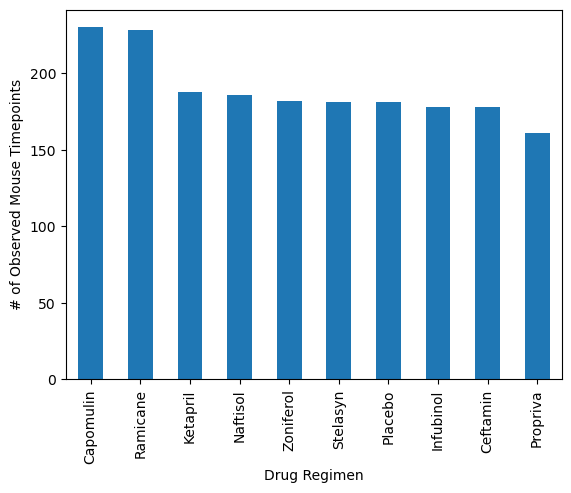

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count = merge_df['Drug Regimen'].value_counts()

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

pandas_drug_count_plot = drug_count.plot.bar()

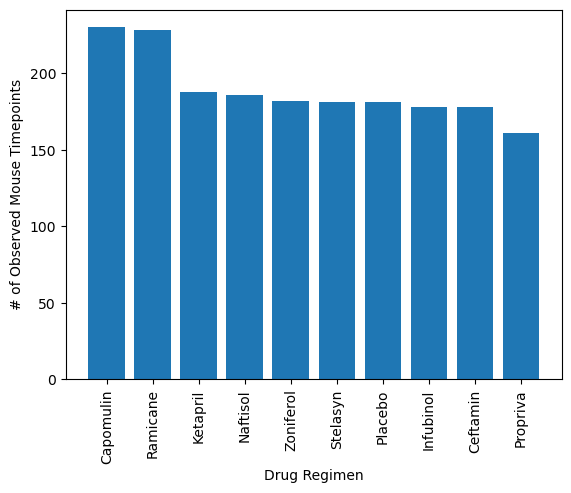

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_count.index.values
y_axis = drug_count.values

plt.bar(x_axis,y_axis)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')

plt.show()

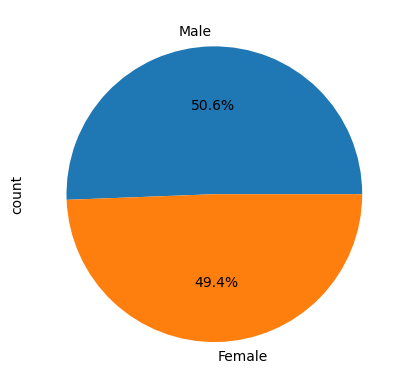

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = merge_df['Sex'].value_counts()

plt.ylabel('Sex')

pandas_gender_chart = gender_distribution.plot.pie(autopct= "%1.1f%%")

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin',:]
ramicane_df = merge_df.loc[merge_df['Drug Regimen'] == 'Ramicane',:]
infubinol_df = merge_df.loc[merge_df['Drug Regimen'] == 'Infubinol',:]
ceftamin_df = merge_df.loc[merge_df['Drug Regimen'] == 'Ceftamin',:]




# Start by getting the last (greatest) timepoint for each mouse
final_tumor = clean_df.groupby(['Mouse ID'])['Timepoint'].max()

final_tumor = final_tumor.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = final_tumor.merge(clean_df,on=['Mouse ID','Timepoint'],how='left')

merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [43]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    vol_tumor = merged_data.loc[merged_data['Drug Regimen']==treatment,'Tumor Volume (mm3)']
    
    # add subset 
    vol_data.append(vol_tumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = vol_tumor.quantile([.25,.5,.75])
    l_quartile = quartiles[0.25]
    u_quartile = quartiles[0.75]
    iqr = u_quartile - l_quartile
    l_bound = l_quartile - (1.5*iqr)
    u_bound = u_quartile + (1.5*iqr)

    outliers = vol_tumor.loc[(vol_tumor>u_bound)|(vol_tumor<l_bound)]
    print(f'{treatment} outliers {outliers}')
    

Capomulin outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


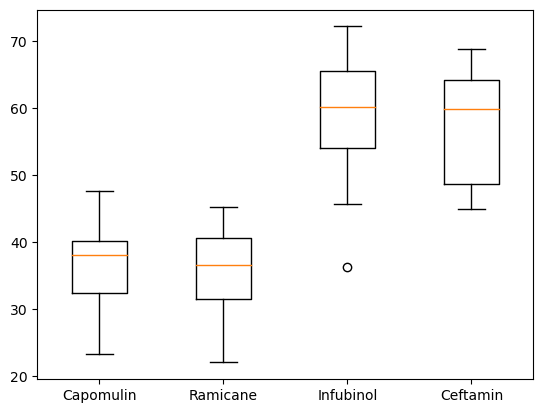

In [47]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='o', markersize=12,
                  linestyle='none', markeredgecolor='g')
plt.boxplot(vol_data,labels=treatments)

plt.show()

## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
